In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [47]:
np.random.seed(42)

In [48]:
x = np.linspace(0, 10, 100)

In [49]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [50]:
x.reshape(-1, 1)

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4

In [51]:
y = 3 * x + 7

In [52]:
y

array([ 7.        ,  7.3030303 ,  7.60606061,  7.90909091,  8.21212121,
        8.51515152,  8.81818182,  9.12121212,  9.42424242,  9.72727273,
       10.03030303, 10.33333333, 10.63636364, 10.93939394, 11.24242424,
       11.54545455, 11.84848485, 12.15151515, 12.45454545, 12.75757576,
       13.06060606, 13.36363636, 13.66666667, 13.96969697, 14.27272727,
       14.57575758, 14.87878788, 15.18181818, 15.48484848, 15.78787879,
       16.09090909, 16.39393939, 16.6969697 , 17.        , 17.3030303 ,
       17.60606061, 17.90909091, 18.21212121, 18.51515152, 18.81818182,
       19.12121212, 19.42424242, 19.72727273, 20.03030303, 20.33333333,
       20.63636364, 20.93939394, 21.24242424, 21.54545455, 21.84848485,
       22.15151515, 22.45454545, 22.75757576, 23.06060606, 23.36363636,
       23.66666667, 23.96969697, 24.27272727, 24.57575758, 24.87878788,
       25.18181818, 25.48484848, 25.78787879, 26.09090909, 26.39393939,
       26.6969697 , 27.        , 27.3030303 , 27.60606061, 27.90

In [53]:
y = y + np.random.normal(0, 10, x.shape)

In [54]:
y

array([11.96714153,  5.92038729, 14.08294599, 23.13938947,  5.87058746,
        6.17378195, 24.61030997, 16.79555941,  4.72949856, 15.15287316,
        5.3961261 ,  5.6760358 , 13.05598635, -8.19340851, -6.00675408,
        5.92257925,  1.72017365, 15.29398848,  3.3743047 , -1.36546126,
       27.71709375, 11.10587336, 14.34194871, -0.27778489,  8.82890003,
       15.68498347,  3.3688521 , 18.93879837,  9.47846159, 12.87094129,
       10.07384297, 34.91672124, 16.56199745,  6.42289071, 25.52847942,
        5.39762411, 19.99772686, -1.38458003,  5.23329103, 20.78679418,
       26.50587792, 21.13792524, 18.5707899 , 17.01926607,  5.54811343,
       13.43792155, 16.33300623, 31.8136465 , 24.98163744,  4.21808329,
       25.39235485, 18.60372265, 15.98835575, 29.17736895, 33.67363159,
       32.97946786, 15.57752174, 21.18060351, 27.88839189, 34.63423915,
       20.3900758 , 23.62825872, 14.72452905, 14.12884285, 34.51919762,
       40.25936998, 26.27989878, 37.33835928, 31.22242086, 21.45

In [55]:
df = pd.DataFrame(data={'x': x.flatten(), 'y': y.flatten()})

In [56]:
df.to_csv('data.csv', index=False)

In [57]:
df = pd.read_csv('data.csv')
X = df[['x']]
y = df['y']

In [58]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [59]:
m = model.coef_[0]
c = model.intercept_

print(f"m: {m}, c: {c}")

m: 3.1379326733665662, c: 5.2718714592262295


In [60]:
y_pred = model.predict(X)

In [61]:
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [62]:
print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")

MSE: 81.4904713498078, RMSE: 9.027207284083367, R2: 0.5067262199801492


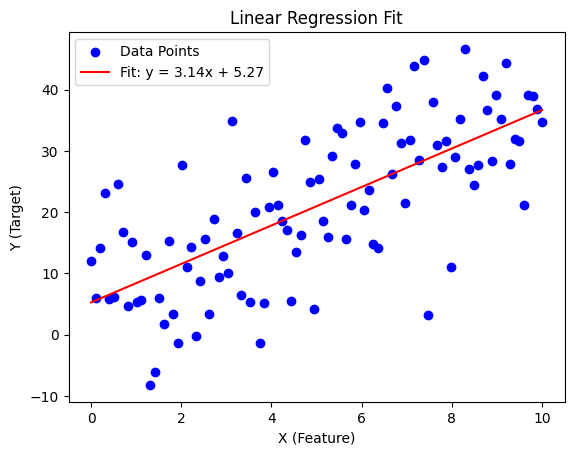

In [63]:
# Plot data points and best-fit line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label=f'Fit: y = {m:.2f}x + {c:.2f}')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()